In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#if the graph is not showing, uncomment the following line
%matplotlib inline
import seaborn as sns
import os
import sys
import time
import datetime
import warnings
import missingno as msno
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport

In [ ]:
#importing data from google drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
#check the list of files .csv
!ls '/content/gdrive/My Drive/data.coderhouse/credit_card'

application_data.csv	 columns_description.gsheet
columns_description.csv  previous_application.csv


In [2]:
#reading the .csv files
df_prev = pd.read_csv('D:/OneDrive/Programacion/coderhouse/coderhouse-proyecto-final/datasets/credit_card/previous_application.csv')
df_app = pd.read_csv('D:/OneDrive/Programacion/coderhouse/coderhouse-proyecto-final/datasets/credit_card/application_data.csv')

In [3]:
#Checking for th unique values in each column
prev_data = df_prev.dropna(axis=1)
prev_data.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_APPLICATION                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2097
NAME_SELLER_INDUSTRY                11
NAME_YIELD_GROUP                     5
dtype: int64

In [4]:
df_prev.shape

(1670214, 37)

In [5]:
df_prev.head(9)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [7]:
df_prev.describe

<bound method NDFrame.describe of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1          

In [8]:
df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

<AxesSubplot:>

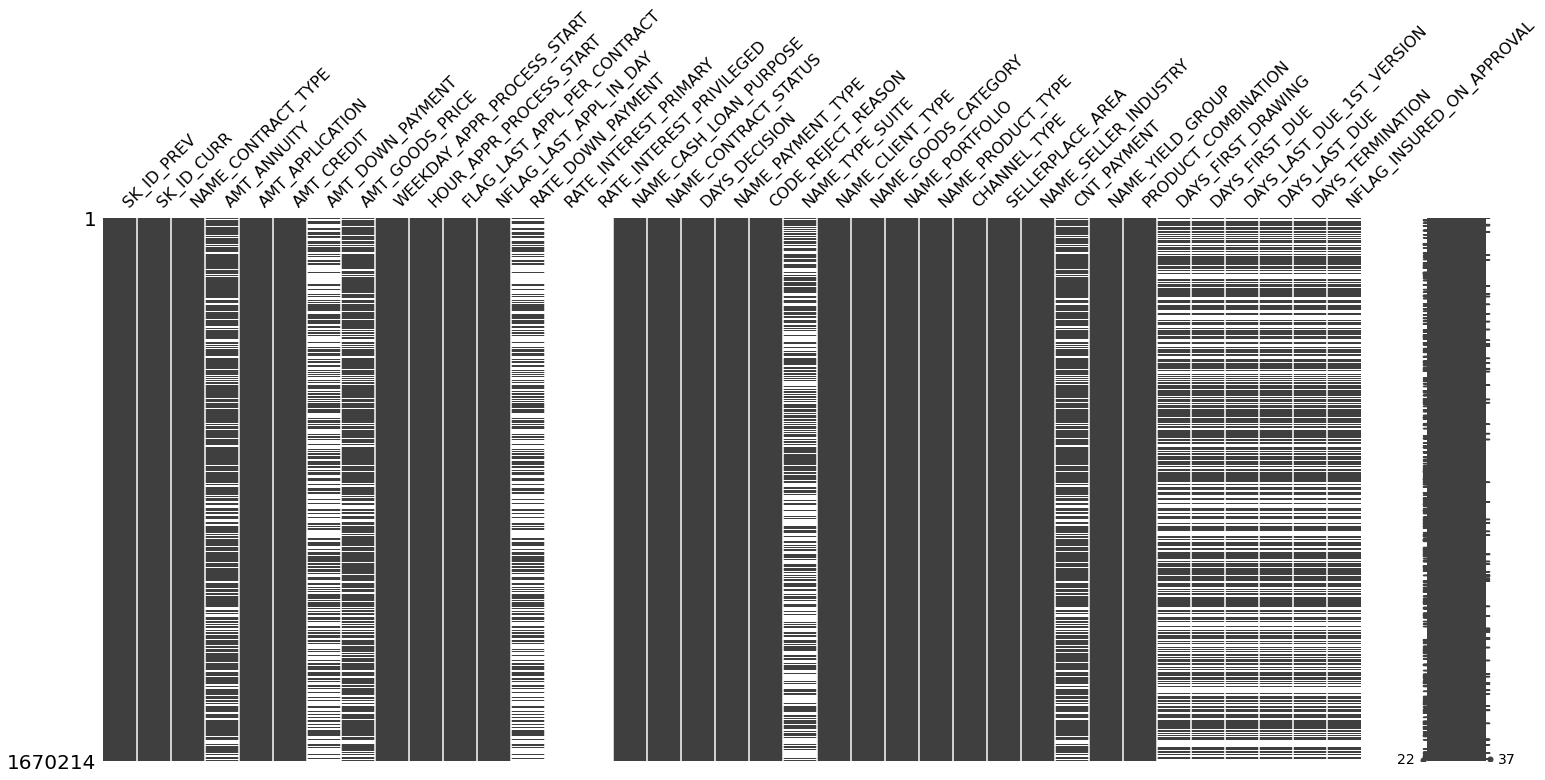

In [4]:
msno.matrix(df_prev)

In [10]:
df_prev[['AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION','HOUR_APPR_PROCESS_START']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,HOUR_APPR_PROCESS_START
count,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.670214e+06
mean,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,1.248418e+01
std,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,3.334028e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000e+00
25%,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,1.000000e+01
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,1.200000e+01
75%,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.500000e+01
max,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,2.300000e+01


In [26]:
df_prev = df_prev.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1)
df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [27]:
pd.DataFrame(df_prev.isna().sum(),columns=['Missings'])

,Missings
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,372235
AMT_APPLICATION,0
AMT_CREDIT,1
AMT_DOWN_PAYMENT,895844
AMT_GOODS_PRICE,385515
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


# Univariado

In [28]:
sns.set(style="ticks", color_codes=True)

In [7]:
g = sns.FacetGrid(df_prev, col="NAME_CONTRACT_TYPE", row="PRODUCT_COMBINATION", height= 5, aspect= 2 ) #, row="WEEKDAY_APPR_PROCESS_START"
g.map_dataframe(sns.histplot, x="HOUR_APPR_PROCESS_START")

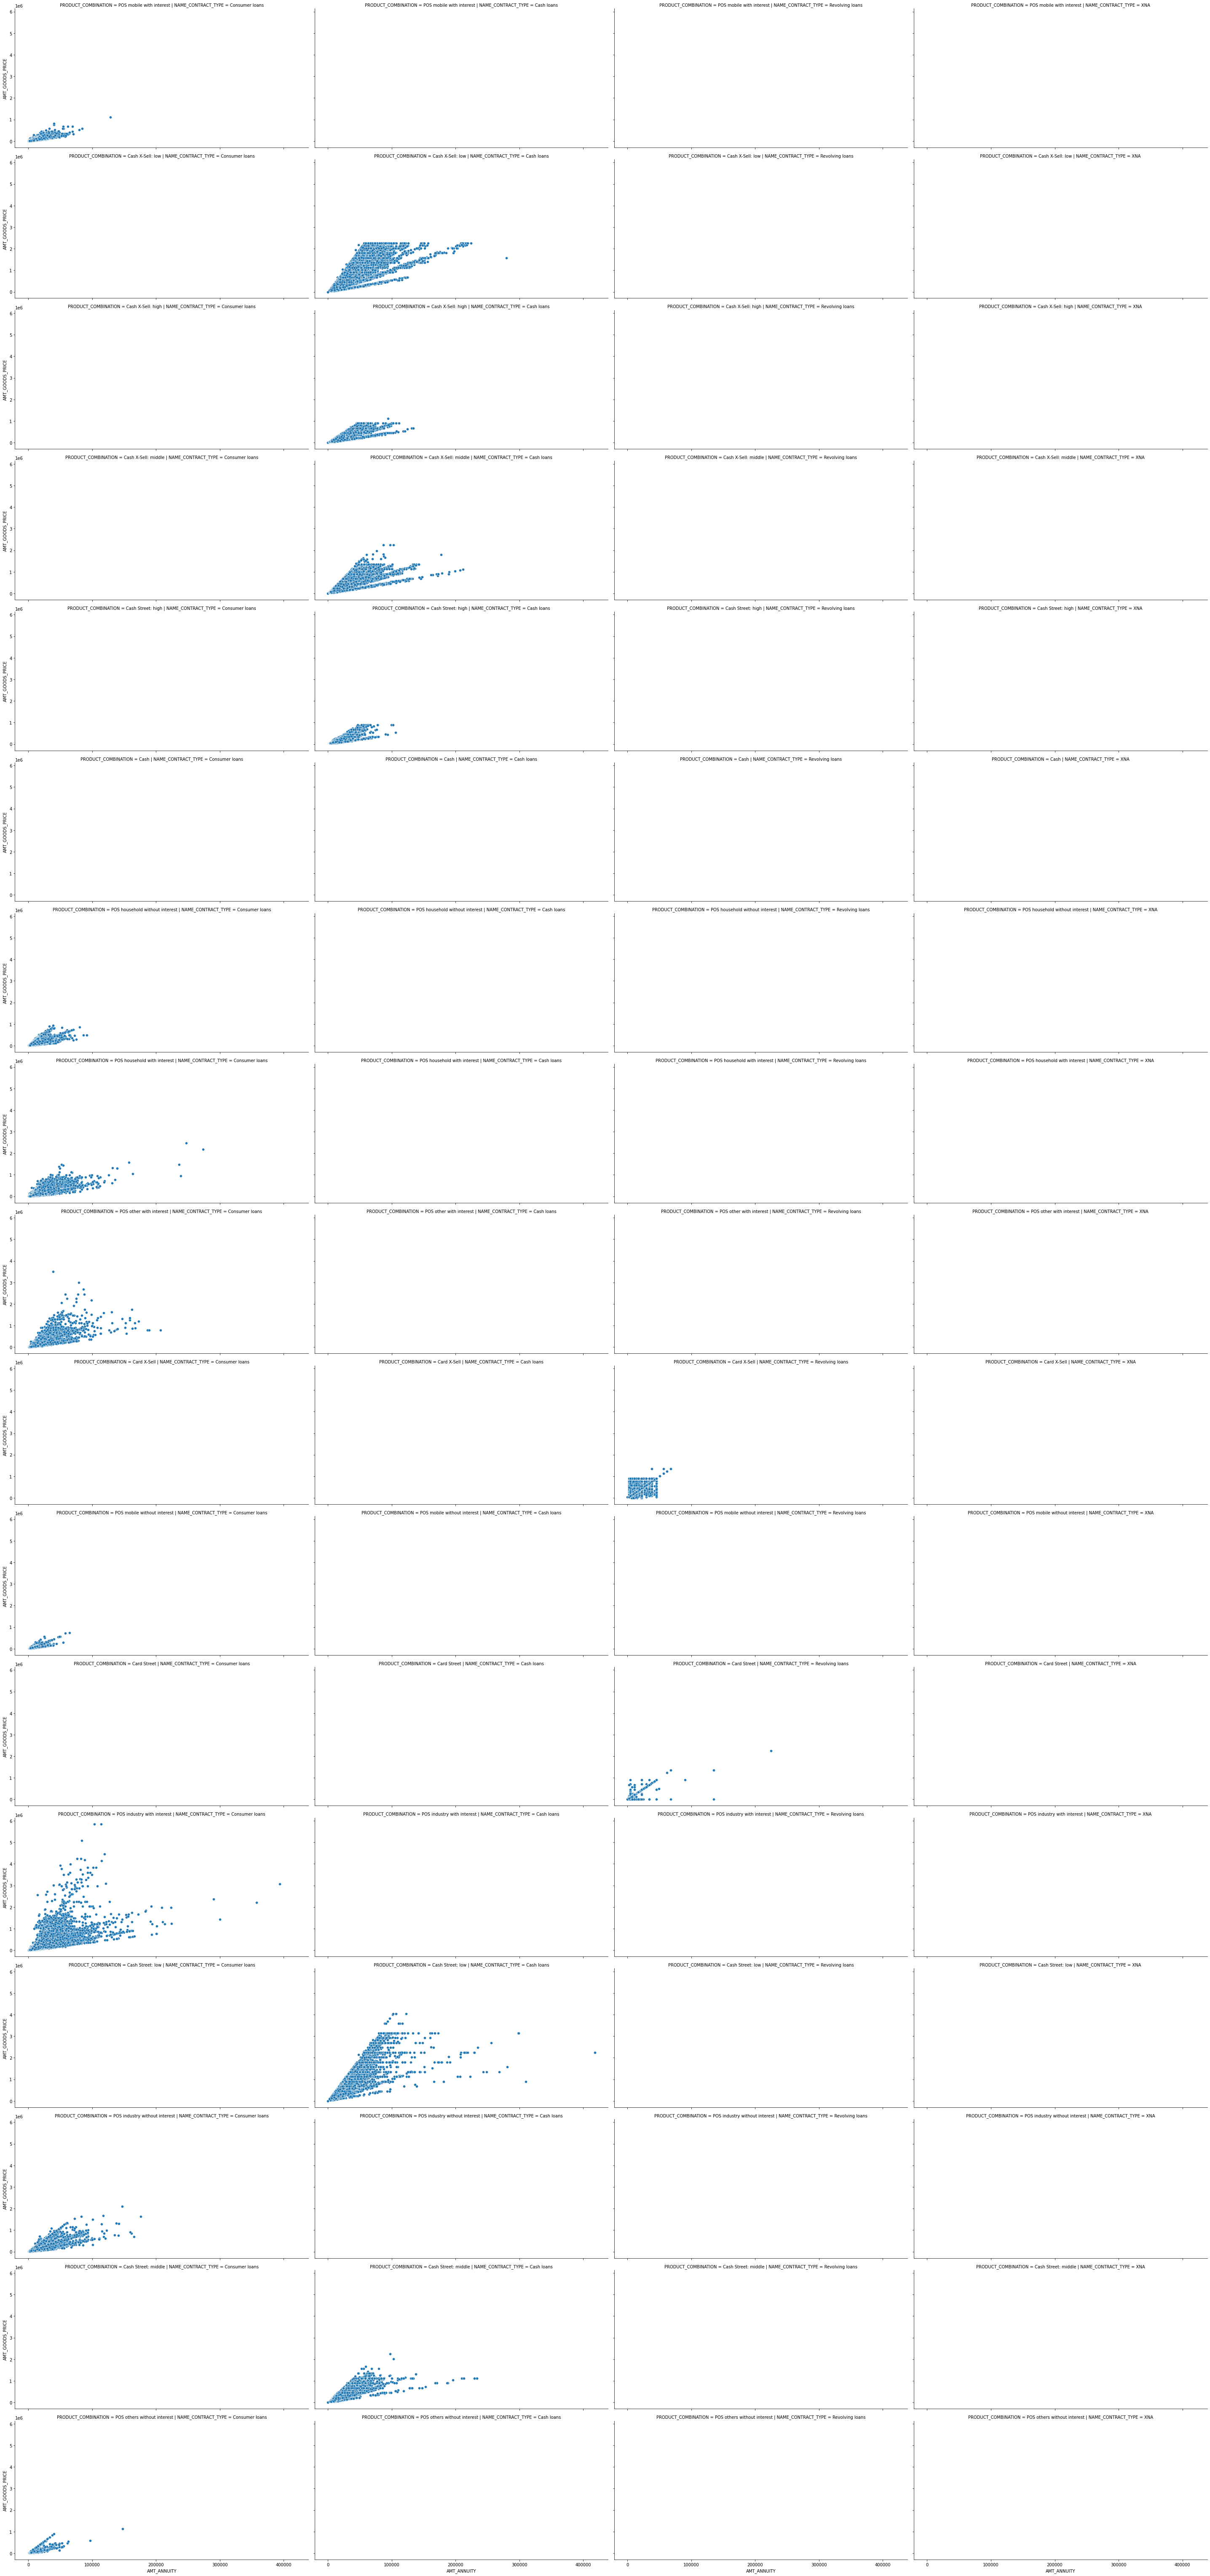

In [6]:
g = sns.FacetGrid(df_prev, col="NAME_CONTRACT_TYPE", row="PRODUCT_COMBINATION", height= 5, aspect= 2) #, row="WEEKDAY_APPR_PROCESS_START"
g.map_dataframe(sns.scatterplot, x="AMT_ANNUITY", y="AMT_GOODS_PRICE")

<AxesSubplot:>

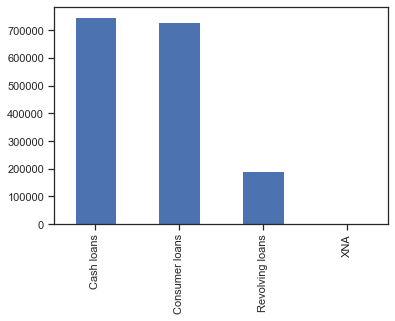

In [31]:
df_prev['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')

In [8]:
columns_to_plot = ['NAME_CONTRACT_TYPE','FLAG_LAST_APPL_PER_CONTRACT','WEEKDAY_APPR_PROCESS_START','NAME_PORTFOLIO','PRODUCT_COMBINATION','NAME_SELLER_INDUSTRY','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY']

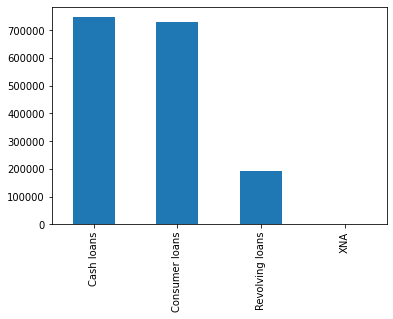

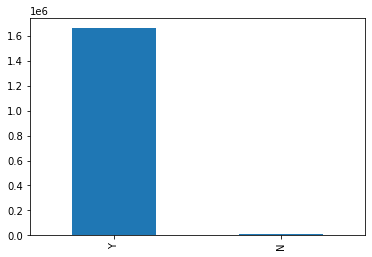

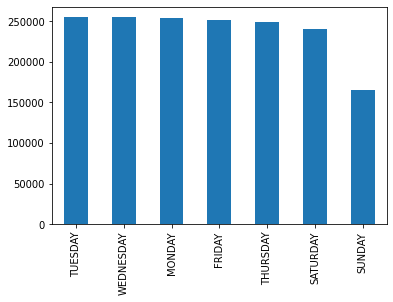

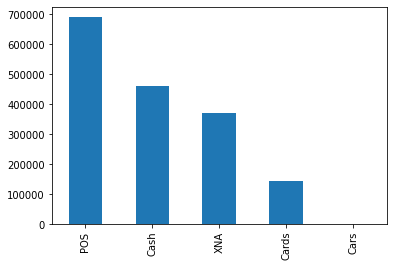

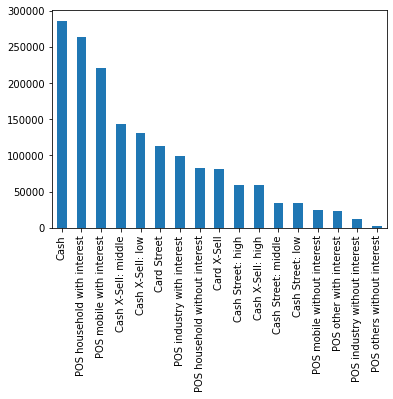

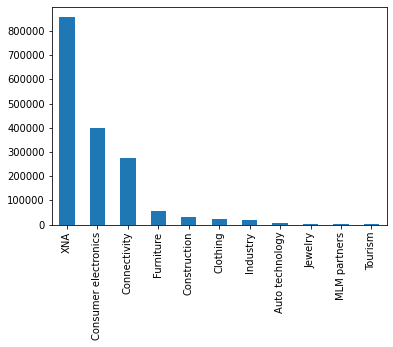

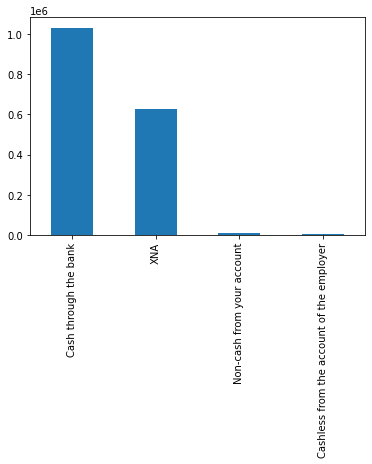

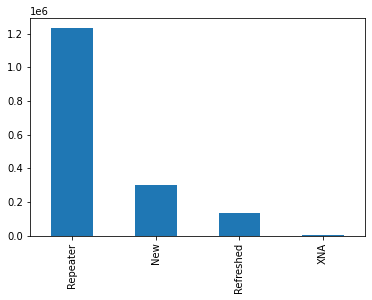

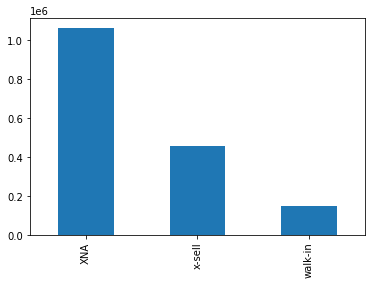

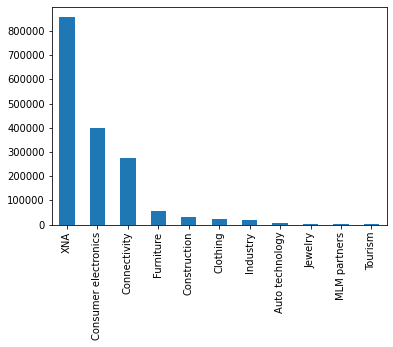

In [9]:
for i in columns_to_plot:
  df_prev[i].value_counts().plot(kind='bar')
  plt.show()

In [10]:
df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# Bivariado

In [11]:
#Creamos una tabla sin ID para analizarla gráficamente
df2 = df_prev.drop(['SK_ID_PREV','SK_ID_CURR'], axis=1)

In [12]:
#Analisis con tipo de contrato y AMT
df3 = {}
for i in df2:
    #for loop for adding the columns to the dictionary
    if "NAME_CONTRACT_TYPE" in i:
        df3[i] = df2[i]
    elif 'AMT' in i:
        df3[i] = df2[i]


In [13]:
df3 = pd.DataFrame(df3)
df3.shape
df4 = df3.iloc[:100000,:]

In [14]:
df4.shape

(100000, 6)

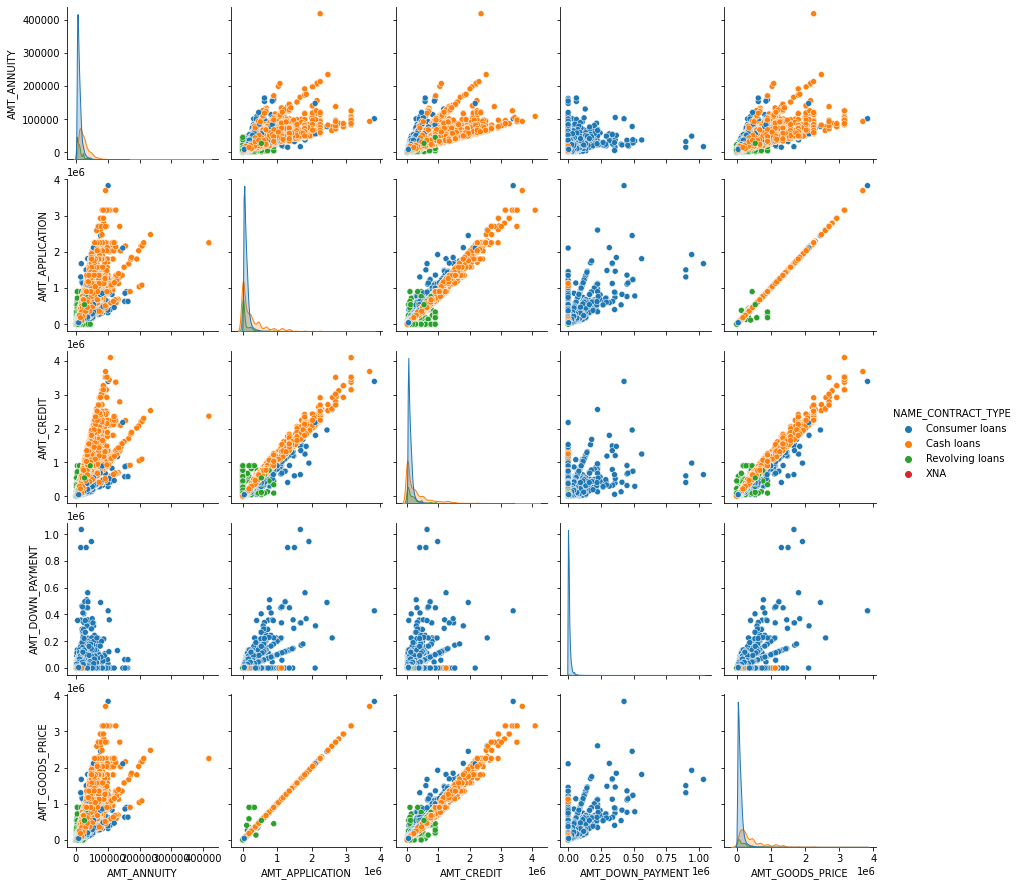

In [15]:
#Creamos el gráfico para verificar la relación entre los campos
sns.pairplot(data = df4, hue= 'NAME_CONTRACT_TYPE')


In [ ]:
#Analisis por tipo de bienes y AMT
df5 = {}
for i in df2:
    #for loop for adding the columns to the dictionary
    if 'NAME_GOODS_CATEGORY' in i:
        df5[i] = df2[i]
    elif 'AMT' in i:
        df5[i] = df2[i]

In [ ]:
df5 = pd.DataFrame(df5)
df5.shape
df6 = df5.iloc[:100000,:]

In [ ]:
df6.columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'NAME_GOODS_CATEGORY'],
      dtype='object')

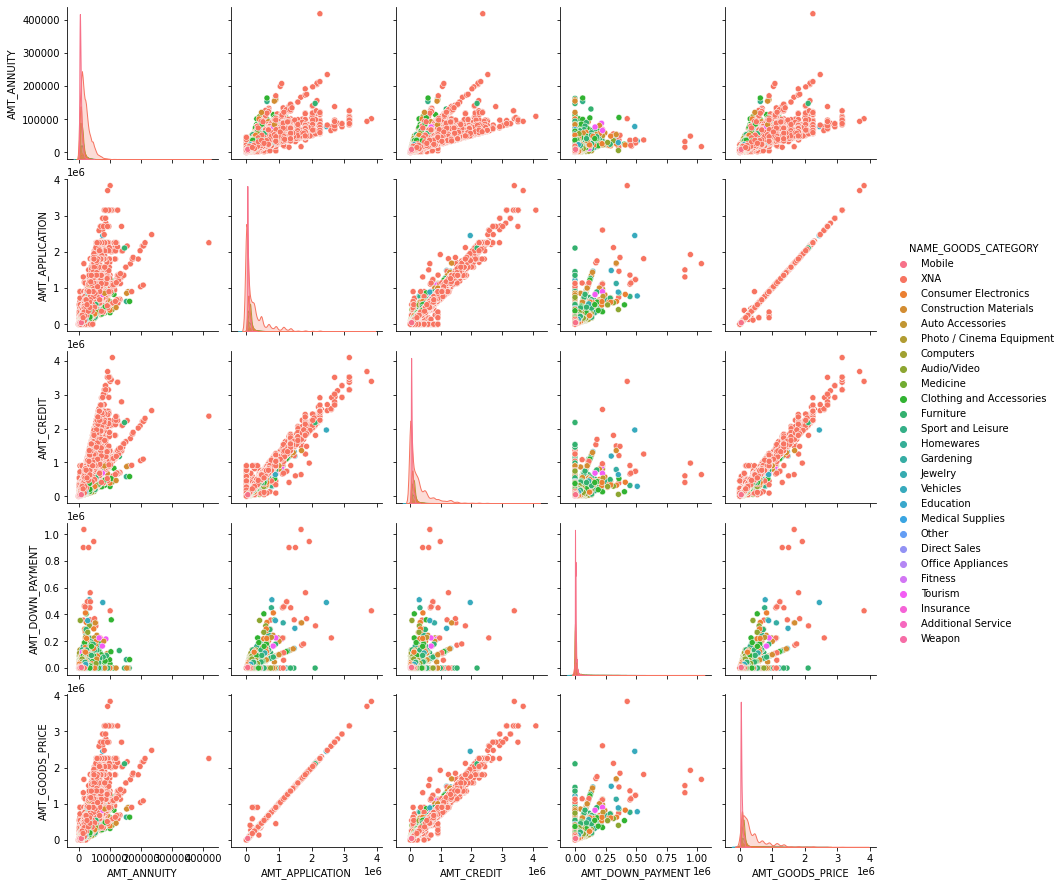

In [ ]:
#Creamos el gráfico para verificar la relación entre los campos
sns.pairplot(data = df6, hue= 'NAME_GOODS_CATEGORY')

In [24]:
#Analisis por tipo de pago y AMT
df7 = {}
for i in df2:
    #for loop for adding the columns to the dictionary
    if 'NAME_PAYMENT_TYPE' in i:
        df7[i] = df2[i]
    elif 'AMT' in i:
        df7[i] = df2[i]

In [25]:
df7 = pd.DataFrame(df7)
df7.shape
df8 = df7.iloc[:100000,:]

In [26]:
df8.columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'NAME_PAYMENT_TYPE'],
      dtype='object')

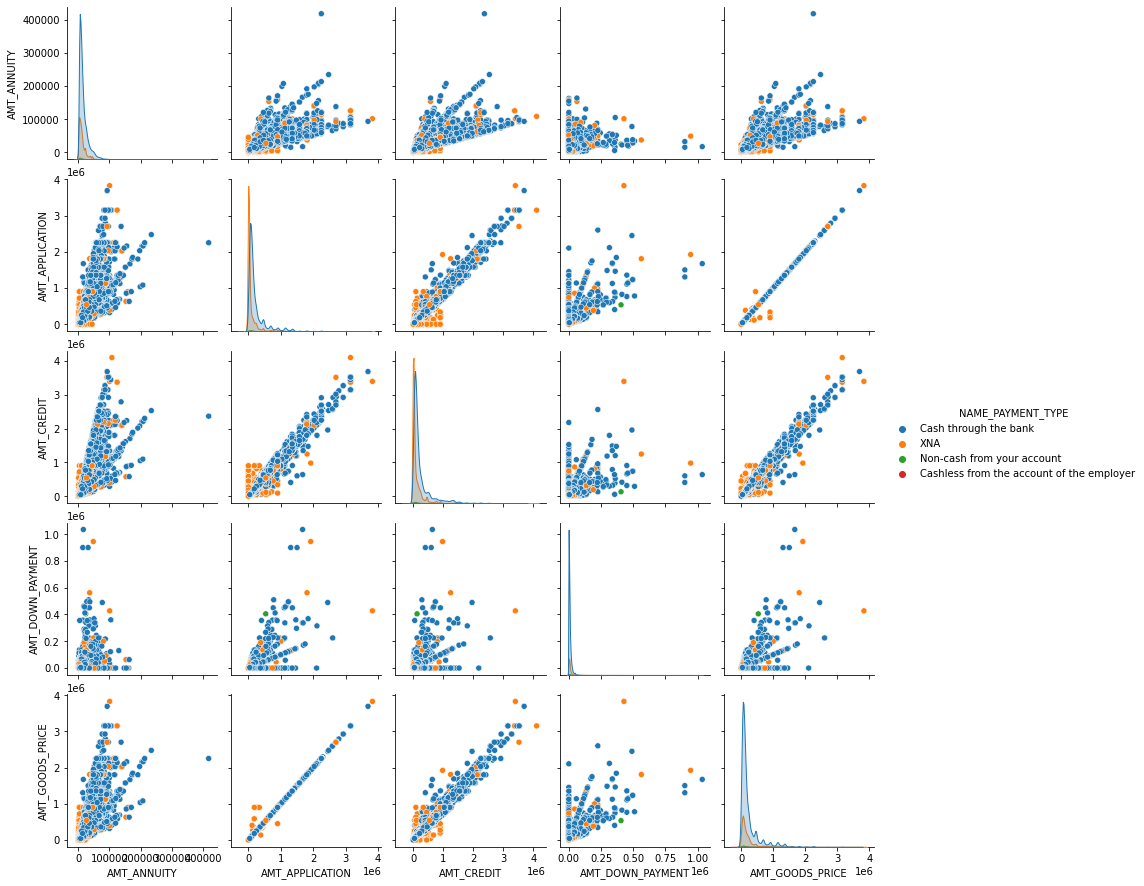

In [27]:
#Creamos el gráfico para verificar la relación entre los campos
sns.pairplot(data = df8, hue= 'NAME_PAYMENT_TYPE')

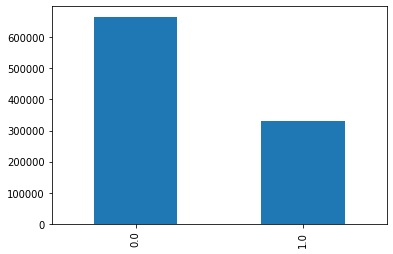

In [61]:
df_prev['NFLAG_INSURED_ON_APPROVAL'].value_counts().plot(kind='bar') #a quick check on  the target variable
plt.show()

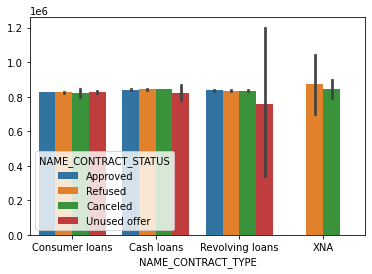

In [60]:
# looking at the number of requests recived for each Contract type and how much of them have been passed/rejected/unused or cancelled.
graph = sns.barplot(x = 'NAME_CONTRACT_TYPE', y = prev_data.index, hue= 'NAME_CONTRACT_STATUS', data = prev_data)

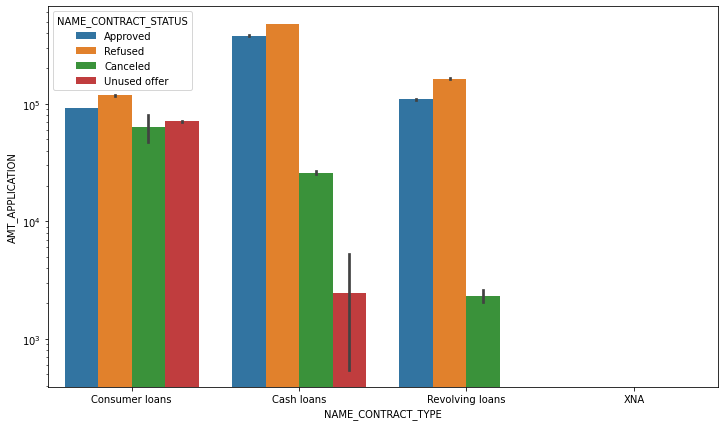

In [70]:
#finding the outliers in the dataset
plt.figure(figsize=(12,7))
ax = sns.barplot(x = 'NAME_CONTRACT_TYPE' , y = 'AMT_APPLICATION',hue = 'NAME_CONTRACT_STATUS',data = prev_data)
ax.set_yscale('log')

In [28]:
#compute the correlation matrix
corr = df_prev.corr()

In [31]:
#generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

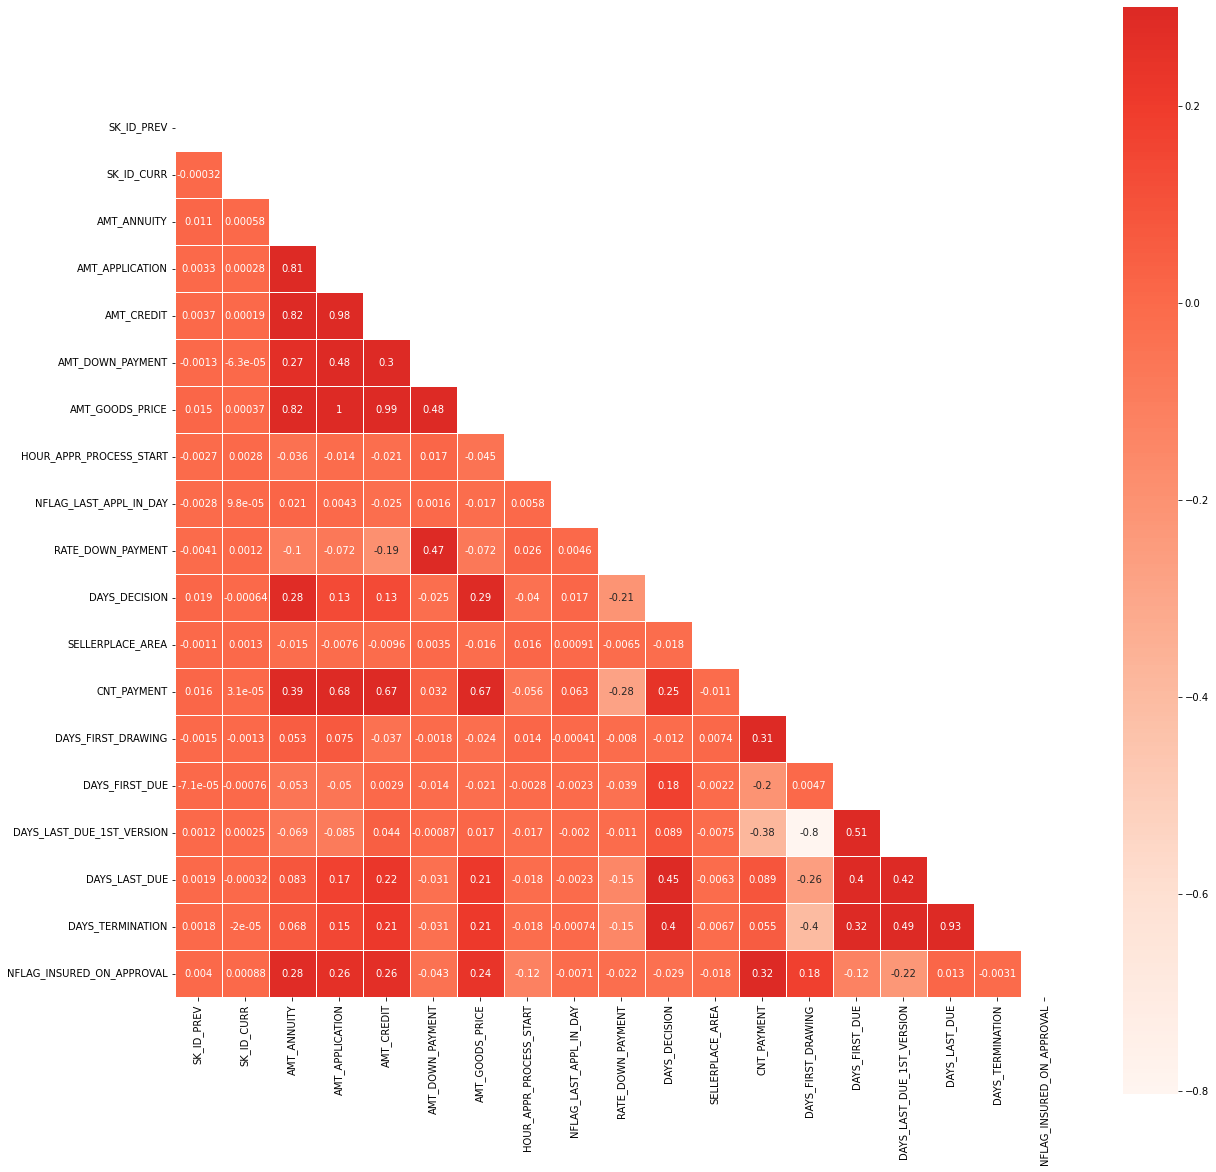

In [35]:
#set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.cm.Reds, vmax=.3, center=0,
            square=True, linewidths=1, annot=True)